In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress
from matplotlib.dates import DateFormatter

# Read and display the Cleaned Data Output CSV File with Pandas
file = "../Desktop/cleaned_data_output.csv"
df = pd.read_csv(file, encoding="ISO-8859-1")
del df ["Unnamed: 0"]
df

,Country,Year,Status,Life Expectancy,Population,Adult Mortality,Under-Five Deaths,Infant Deaths,HIV/AIDS,Diphtheria,...,Polio,Thinness 5-9 years,Thinness 1-19 years,Alcohol,BMI,GDP,Percentage Expenditure,Total Expenditure,Income Composition of Resources,Schooling
0,Afghanistan,2014,Developing,59.9,327582.0,271.0,86,64,0.1,62.0,...,58.0,17.5,17.5,0.01,18.6,612.696514,73.523582,8.18,0.476,10.0
1,Afghanistan,2013,Developing,59.9,31731688.0,268.0,89,66,0.1,64.0,...,62.0,17.7,17.7,0.01,18.1,631.744976,73.219243,8.13,0.470,9.9
2,Afghanistan,2012,Developing,59.5,3696958.0,272.0,93,69,0.1,67.0,...,67.0,18.0,17.9,0.01,17.6,669.959000,78.184215,8.52,0.463,9.8
3,Afghanistan,2011,Developing,59.2,2978599.0,275.0,97,71,0.1,68.0,...,68.0,18.2,18.2,0.01,17.2,63.537231,7.097109,7.87,0.454,9.5
4,Afghanistan,2010,Developing,58.8,2883167.0,279.0,102,74,0.1,66.0,...,66.0,18.4,18.4,0.01,16.7,553.328940,79.679367,9.20,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,Zimbabwe,2004,Developing,44.3,12777511.0,723.0,42,27,33.6,65.0,...,67.0,9.4,9.4,4.36,27.1,454.366654,0.000000,7.13,0.407,9.2
1643,Zimbabwe,2003,Developing,44.5,12633897.0,715.0,41,26,36.7,68.0,...,7.0,9.9,9.8,4.06,26.7,453.351155,0.000000,6.52,0.418,9.5
1644,Zimbabwe,2002,Developing,44.8,125525.0,73.0,40,25,39.8,71.0,...,73.0,1.3,1.2,4.43,26.3,57.348340,0.000000,6.53,0.427,10.0
1645,Zimbabwe,2001,Developing,45.3,12366165.0,686.0,39,25,42.1,75.0,...,76.0,1.7,1.6,1.72,25.9,548.587312,0.000000,6.16,0.427,9.8


In [98]:
# Create Developed and Developing DataFrames

# Define variables to determine developed vs. developing countries
developed_status = df["Status"] == "Developed"
developing_status = df["Status"] == "Developing"

# Place the variables from above into DataFrames 
developed_countries = df[developed_status]
developing_countries = df[developing_status]

# Reset the index for each DataFrame
developed_countries = developed_countries.reset_index(drop=True)
developing_countries = developing_countries.reset_index(drop=True)
developing_countries.head()

,Country,Year,Status,Life Expectancy,Population,Adult Mortality,Under-Five Deaths,Infant Deaths,HIV/AIDS,Diphtheria,...,Polio,Thinness 5-9 years,Thinness 1-19 years,Alcohol,BMI,GDP,Percentage Expenditure,Total Expenditure,Income Composition of Resources,Schooling
0,Afghanistan,2014,Developing,59.9,327582.0,271.0,86,64,0.1,62.0,...,58.0,17.5,17.5,0.01,18.6,612.696514,73.523582,8.18,0.476,10.0
1,Afghanistan,2013,Developing,59.9,31731688.0,268.0,89,66,0.1,64.0,...,62.0,17.7,17.7,0.01,18.1,631.744976,73.219243,8.13,0.470,9.9
2,Afghanistan,2012,Developing,59.5,3696958.0,272.0,93,69,0.1,67.0,...,67.0,18.0,17.9,0.01,17.6,669.959000,78.184215,8.52,0.463,9.8
3,Afghanistan,2011,Developing,59.2,2978599.0,275.0,97,71,0.1,68.0,...,68.0,18.2,18.2,0.01,17.2,63.537231,7.097109,7.87,0.454,9.5
4,Afghanistan,2010,Developing,58.8,2883167.0,279.0,102,74,0.1,66.0,...,66.0,18.4,18.4,0.01,16.7,553.328940,79.679367,9.20,0.448,9.2


In [99]:
# Gather average life expectancies from 2000 - 2015 for developed countries
avg_life_expectancy_developed = developed_countries.groupby('Year')['Life Expectancy'].mean()
avg_life_expectancy_developed

Year
2000    76.084615
2001    76.571429
2002    76.864286
2003    77.213333
2004    77.906667
2005    78.313333
2006    78.406667
2007    78.462500
2008    77.881250
2009    78.337500
2010    79.388235
2011    80.721053
2012    80.273684
2013    80.300000
2014    81.026316
Name: Life Expectancy, dtype: float64

In [100]:
# Gather average life expectancies from 2000 - 2015 for developing countries
avg_life_expectancy_developing = developing_countries.groupby('Year')['Life Expectancy'].mean()
avg_life_expectancy_developing

Year
2000    68.606250
2001    68.557692
2002    66.853731
2003    66.681250
2004    66.819318
2005    66.918947
2006    67.464646
2007    67.168269
2008    67.288785
2009    67.389091
2010    67.555856
2011    68.004505
2012    68.512727
2013    68.690991
2014    68.737500
Name: Life Expectancy, dtype: float64

<IPython.core.display.Javascript object>


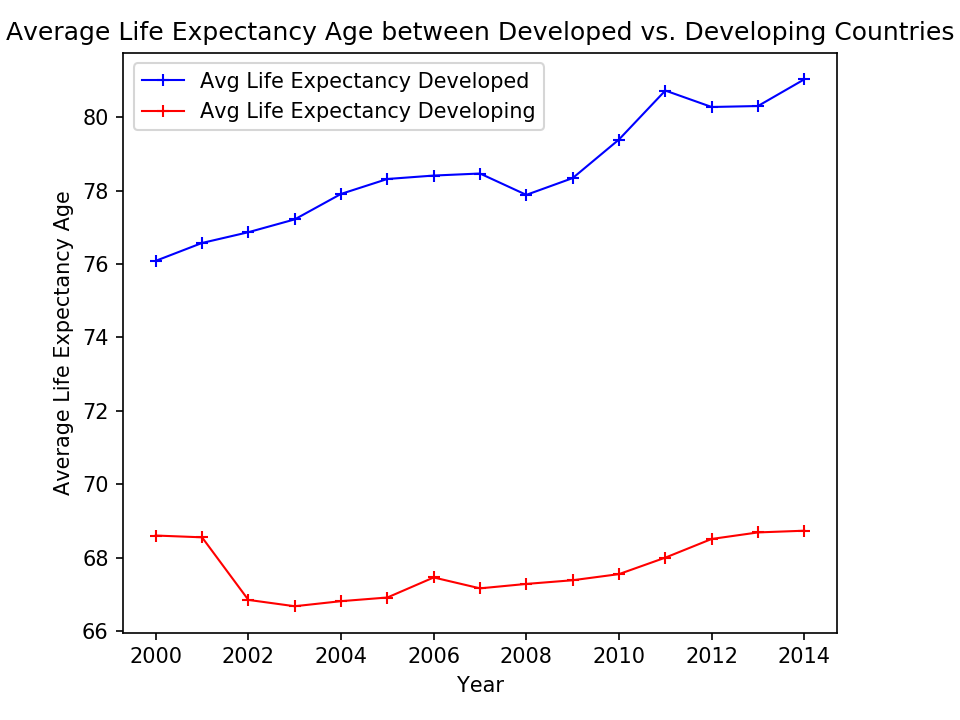

In [105]:
# Create a line plot for Average Life Expectancy
life_expectancy_developed, = plt.plot(avg_life_expectancy_developed, marker="+",color="blue", linewidth=1, label="Avg Life Expectancy Developed")
life_expectancy_developing, = plt.plot(avg_life_expectancy_developing, marker="+",color="red", linewidth=1, label="Avg Life Expectancy Developing")

# Set our legend to where the chart thinks is best
plt.legend(handles=[life_expectancy_developed, life_expectancy_developing], loc="best")

plt.title("Average Life Expectancy Age between Developed vs. Developing Countries")
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy Age")
plt.tight_layout()

In [113]:
regrouped_developed = developed_countries.groupby(["Status", "Country"]).mean()["Life Expectancy"]
sorted_top5_developed = regrouped_developed.sort_values(ascending=False)
sorted_top5_developed.head()

Status     Country  
Developed  Ireland      83.440000
           Italy        82.153333
           Spain        82.020000
           Australia    81.907143
           Sweden       81.900000
Name: Life Expectancy, dtype: float64

In [114]:
sorted_bottom5_developed = regrouped_developed.sort_values(ascending=True)
sorted_bottom5_developed.head()

Status     Country  
Developed  Bulgaria     72.740000
           Lithuania    72.753333
           Latvia       73.673333
           Romania      73.986667
           Poland       75.526667
Name: Life Expectancy, dtype: float64

In [115]:
regrouped_developing = developing_countries.groupby(["Status", "Country"]).mean()["Life Expectancy"]
sorted_top5_developing = regrouped_developing.sort_values(ascending=False)
sorted_top5_developing.head()

Status      Country
Developing  Canada     82.233333
            France     82.206667
            Greece     81.233333
            Israel     81.220000
            Chile      79.944444
Name: Life Expectancy, dtype: float64

In [116]:
sorted_bottom5_developing = regrouped_developing.sort_values(ascending=True)
sorted_bottom5_developing.head()

Status      Country     
Developing  Sierra Leone    48.425000
            Lesotho         48.608333
            Zimbabwe        49.386667
            Malawi          50.261538
            Angola          50.675000
Name: Life Expectancy, dtype: float64

<IPython.core.display.Javascript object>


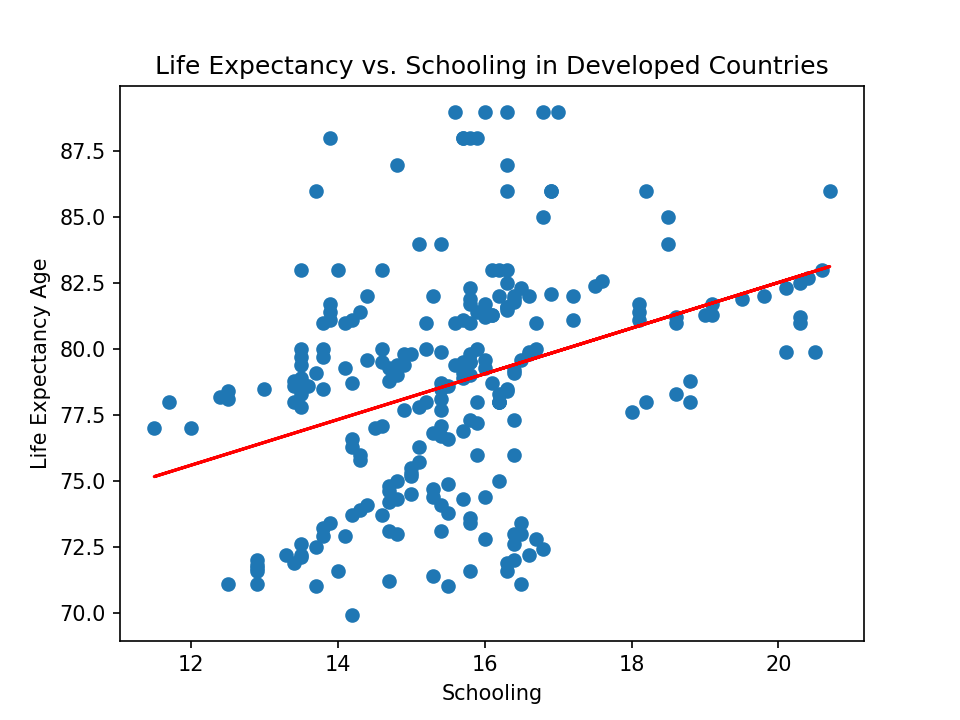

The Correlation (R) between Life Expectancy Age and Schooling in Developed Countries is: 0.36


In [106]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = developed_countries["Schooling"]
y_values = developed_countries["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Schooling in Developed Countries")
plt.xlabel("Schooling")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(0.1,80),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Schooling in Developed Countries is: {round(rvalue,2)}")

# Show plot
plt.show()

<IPython.core.display.Javascript object>


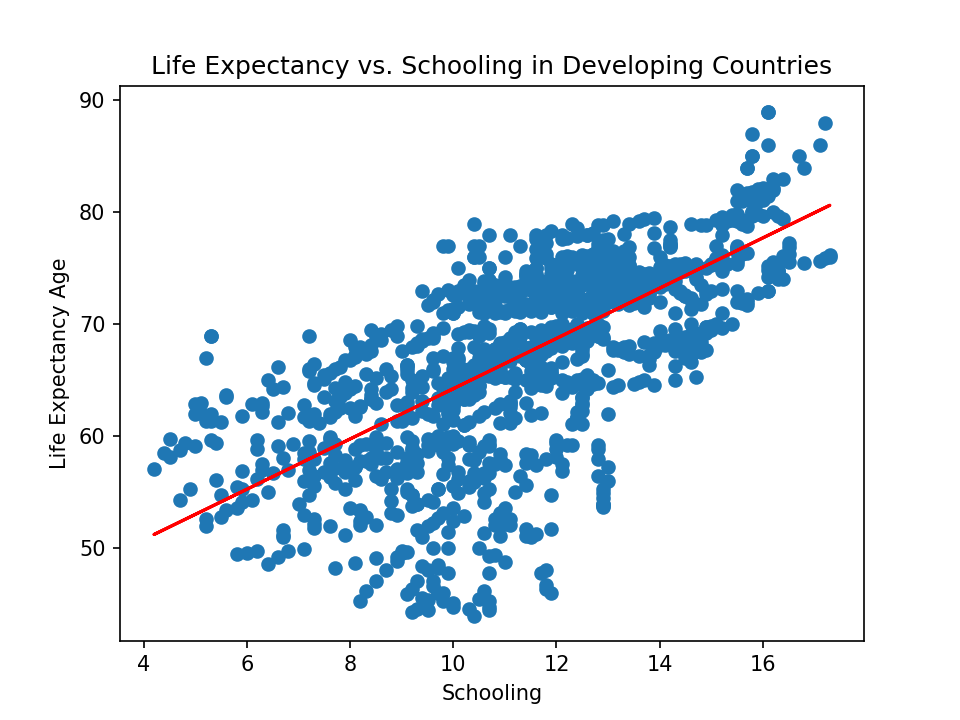

The Correlation (R) between Life Expectancy Age and Schooling in Developing Countries is: 0.67


In [107]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = developing_countries["Schooling"]
y_values = developing_countries["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Schooling in Developing Countries")
plt.xlabel("Schooling")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(0.1,80),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Schooling in Developing Countries is: {round(rvalue,2)}")

# Show plot
plt.show()

In [102]:
avg_schooling_developed = developed_countries.groupby('Year')['Schooling'].mean()
avg_schooling_developed

Year
2000    14.484615
2001    15.050000
2002    15.292857
2003    15.273333
2004    15.486667
2005    15.326667
2006    15.420000
2007    15.312500
2008    15.450000
2009    15.562500
2010    15.835294
2011    16.021053
2012    16.036842
2013    16.057895
2014    16.236842
Name: Schooling, dtype: float64

In [103]:
avg_schooling_developing = developing_countries.groupby('Year')['Schooling'].mean()
avg_schooling_developing

Year
2000    11.308333
2001    11.357692
2002    11.164179
2003    11.147500
2004    11.212500
2005    11.262105
2006    11.383838
2007    11.307692
2008    11.399065
2009    11.410000
2010    11.563063
2011    11.726126
2012    11.937273
2013    12.024324
2014    12.072321
Name: Schooling, dtype: float64

<IPython.core.display.Javascript object>


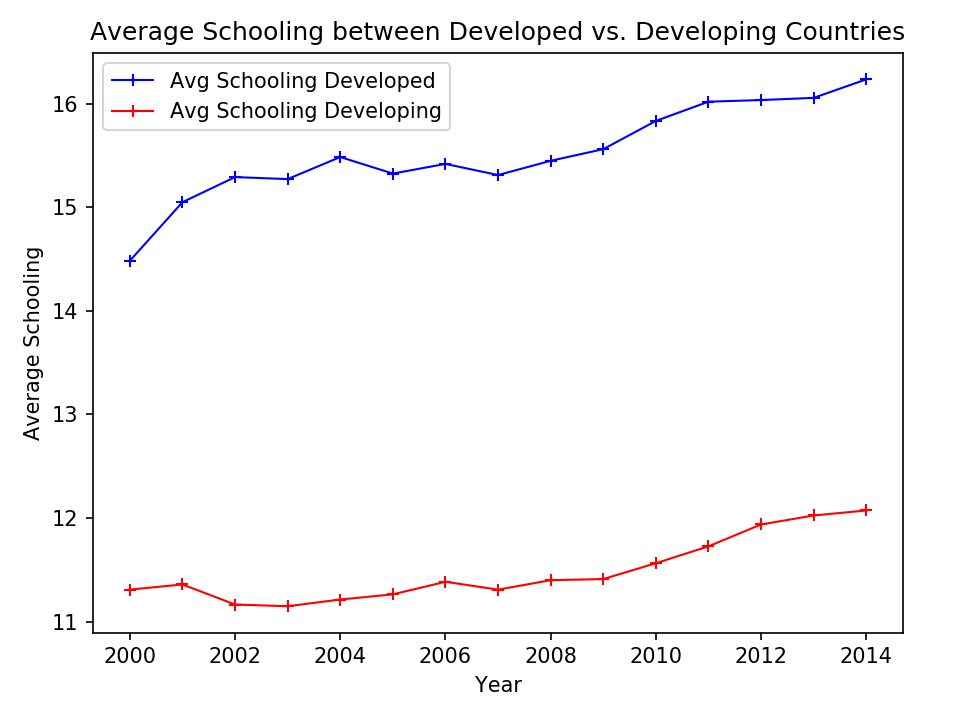

In [108]:
# Create a line plot for Average Schooling
schooling_developed, = plt.plot(avg_schooling_developed, marker="+",color="blue", linewidth=1, label="Avg Schooling Developed")
schooling_developing, = plt.plot(avg_schooling_developing, marker="+",color="red", linewidth=1, label="Avg Schooling Developing")

# Set our legend to where the chart thinks is best
plt.legend(handles=[schooling_developed, schooling_developing], loc="best")

plt.title("Average Schooling between Developed vs. Developing Countries")
plt.xlabel("Year")
plt.ylabel("Average Schooling")
plt.tight_layout()